In [122]:
import result_analization.load_test_result as ltr
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [123]:
path = "/Users/nduginets/PycharmProjects/master-diploma/tmp_data/classifiers"

In [124]:
#pix2pix20 = ltr.get_vals(path, "bussio_pix_2pix_classifier_20")
#pix2pix50 = ltr.get_vals(path, "bussio_pix_2pix_classifier_50")
pix2pix80 = ltr.get_vals(path, "bussio_pix_2pix_classifier_80")

pix2pix120 = ltr.get_vals(path, "bussio_pix_2pix_classifier_120")
pix2pix150 = ltr.get_vals(path, "bussio_pix_2pix_classifier_150")
pix2pix180 = ltr.get_vals(path, "bussio_pix_2pix_classifier_180")

datasets = [
    #("bussio_pix2pix20", pix2pix20),
    #("bussio_pix2pix50", pix2pix50),
    ("bussio_pix2pix80", pix2pix80),
    #("bussio_pix2pix120", pix2pix120),
    ("bussio_pix2pix150", pix2pix150),
    ("bussio_pix2pix180", pix2pix180),
]
default_data_bussio = ltr.create_dataset(datasets)

In [125]:
#pix2pix20 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_20")
#pix2pix50 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_50")
pix2pix80 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_80")

#pix2pix120 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_120")
pix2pix150 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_150")
pix2pix180 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_180")

datasets = [
    #("boxed_bussio_pix2pix20", pix2pix20),
    #("boxed_bussio_pix2pix50", pix2pix50),
    ("boxed_bussio_pix2pix80", pix2pix80),
    #("boxed_bussio_pix2pix120", pix2pix120),
    ("boxed_bussio_pix2pix150", pix2pix150),
    ("boxed_bussio_pix2pix180", pix2pix180),
]
boxed_data_bussio = ltr.create_dataset(datasets)

In [126]:
classifier = ltr.get_vals(path, "bussio_classifier_")

datasets = [
    ("classifier", classifier)
]
classifier_bussio = ltr.create_dataset(datasets)

In [127]:
def get_last_values(dataset_to_fetch, *args):
    result = []
    for (name, data) in dataset_to_fetch:
        values_to_return = []
        latest_epoch = max([max(list(map(lambda x: x, launch.keys()))) for launch in data])
        for launch in data:
            if latest_epoch not in launch:
                continue
            initial_node = launch[latest_epoch]
            for p in args:
                initial_node = initial_node[p]
            values_to_return.append(initial_node)
        result.append((name, values_to_return))
    return result

In [128]:
def calculate_var(dataset_prepared):
    result = []
    for (name, data) in dataset_prepared:
        array = np.array(data)

        result.append((name, np.var(array)))
    return result

In [129]:
def calculate_avg(dataset_prepared):
    result = []
    for (name, data) in dataset_prepared:
        array = np.array(data)

        result.append((name, np.mean(array)))
    return result

In [130]:
def dump_stat(measure_path):
    merged_dataset = classifier_bussio + boxed_data_bussio + default_data_bussio
    variances = calculate_var(get_last_values(merged_dataset, *measure_path))
    means = calculate_avg(get_last_values(merged_dataset, *measure_path))

    x = list(map(lambda v: v[0], merged_dataset))
    y = list(map(lambda v: v[1], means))
    e = list(map(lambda v: math.sqrt(v[1]), variances))

    print(*measure_path)
    plt.figure(figsize=(20, 10))
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xticks(rotation=45)
    plt.show()

    datas = zip(y, e)
    frame = pd.DataFrame(datas, index=x, columns=["avg", "var"])
    print(frame)

f1_micro
                              avg       var
classifier               0.853760  0.003610
boxed_bussio_pix2pix80   0.839378  0.004443
boxed_bussio_pix2pix150  0.873760  0.019958
boxed_bussio_pix2pix180  0.886200  0.021886
bussio_pix2pix80         0.843040  0.003556
bussio_pix2pix150        0.866560  0.004621
bussio_pix2pix180        0.871200  0.005724


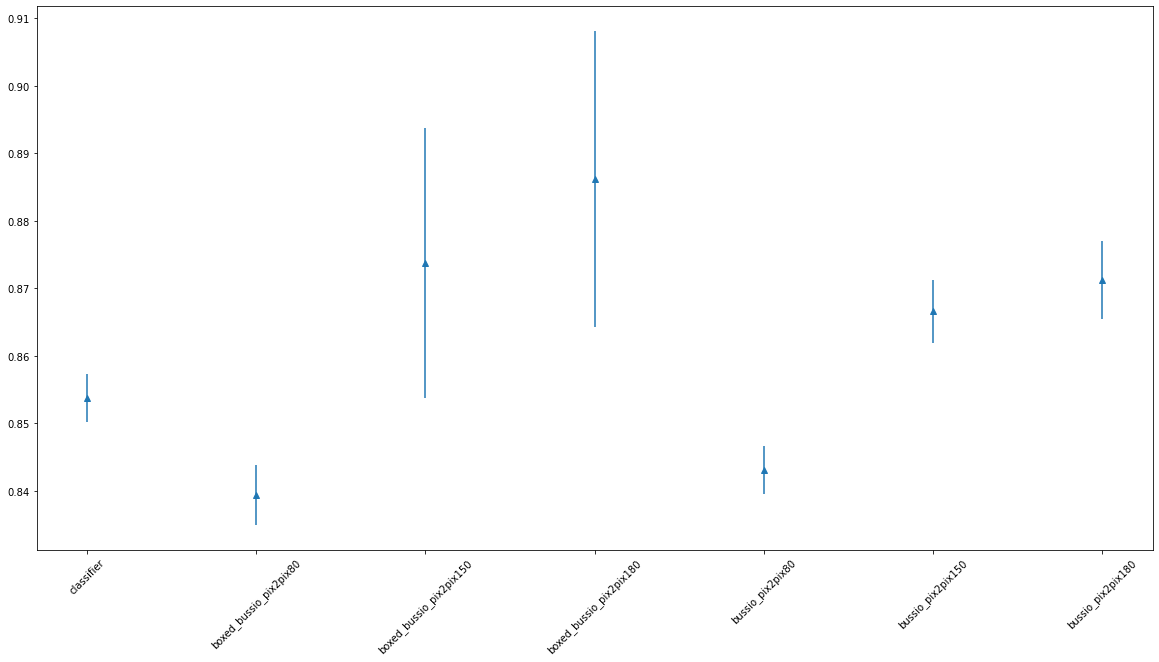

In [131]:
measure_path = ["f1_micro"]
dump_stat(measure_path)

f1_macro
                              avg       var
classifier               0.421119  0.028795
boxed_bussio_pix2pix80   0.397661  0.027936
boxed_bussio_pix2pix150  0.570357  0.095927
boxed_bussio_pix2pix180  0.627846  0.109658
bussio_pix2pix80         0.390598  0.023916
bussio_pix2pix150        0.538127  0.019832
bussio_pix2pix180        0.578786  0.021649


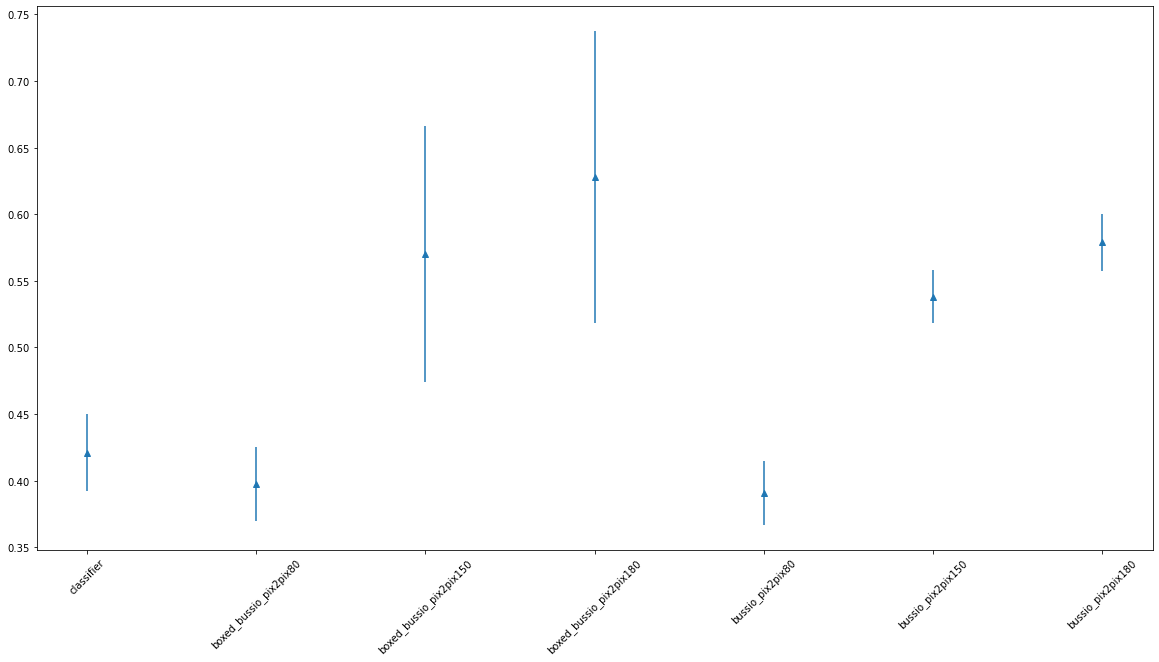

In [132]:
measure_path = ["f1_macro"]
dump_stat(measure_path)

# заболевания f1_binary

globules f1_binary
                              avg       var
classifier               0.497971  0.045388
boxed_bussio_pix2pix80   0.341799  0.061174
boxed_bussio_pix2pix150  0.649366  0.081668
boxed_bussio_pix2pix180  0.700005  0.075808
bussio_pix2pix80         0.368180  0.069748
bussio_pix2pix150        0.635447  0.043370
bussio_pix2pix180        0.631787  0.045131


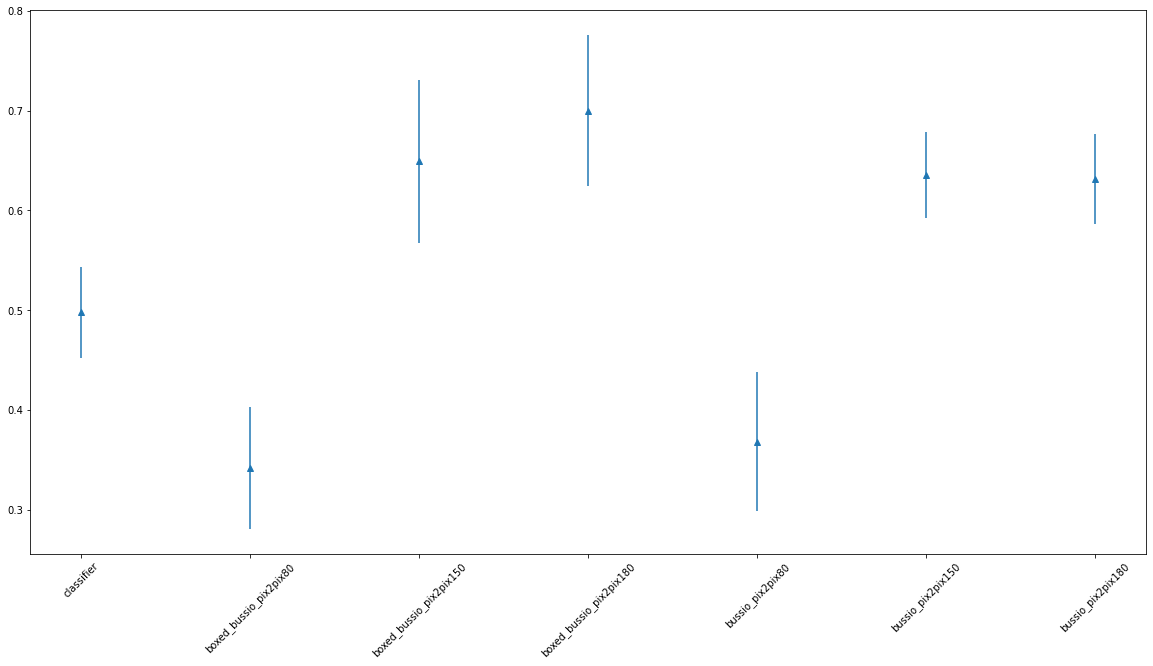

In [133]:
measure_path = ["globules", "f1_binary"]
dump_stat(measure_path)

milia_like_cyst f1_binary
                              avg       var
classifier               0.200791  0.041032
boxed_bussio_pix2pix80   0.189423  0.053949
boxed_bussio_pix2pix150  0.364990  0.130889
boxed_bussio_pix2pix180  0.474305  0.133540
bussio_pix2pix80         0.168093  0.036778
bussio_pix2pix150        0.344060  0.054187
bussio_pix2pix180        0.389681  0.048559


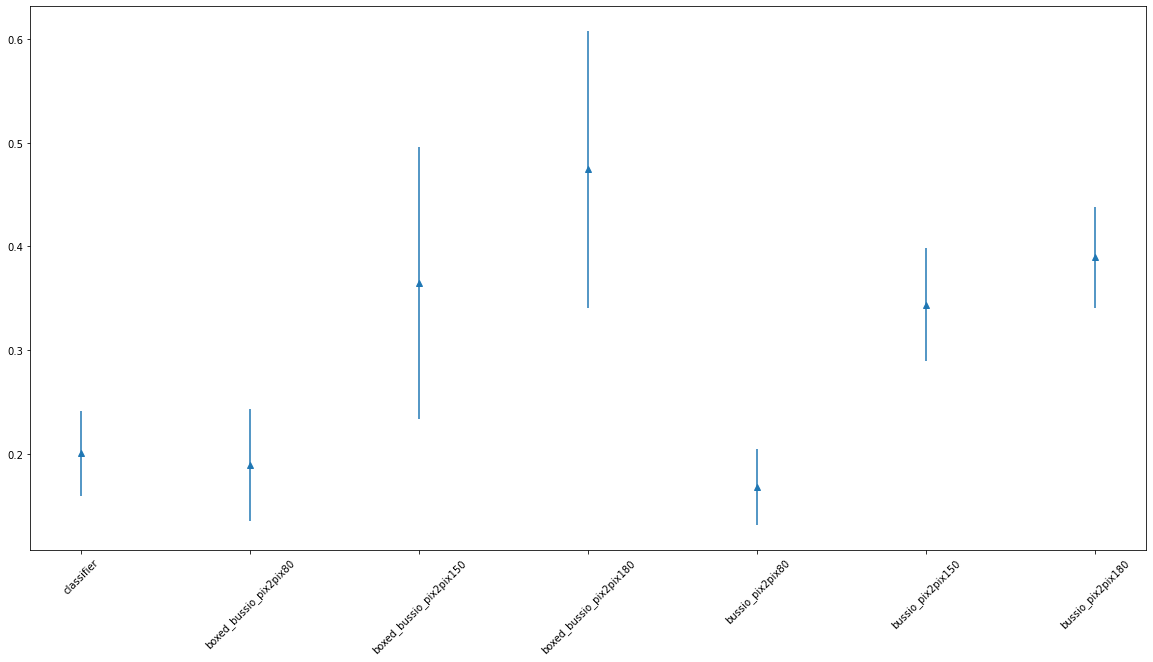

In [134]:
measure_path = ["milia_like_cyst", "f1_binary"]
dump_stat(measure_path)

negative_network f1_binary
                              avg       var
classifier               0.000000  0.000000
boxed_bussio_pix2pix80   0.000000  0.000000
boxed_bussio_pix2pix150  0.083806  0.202421
boxed_bussio_pix2pix180  0.214088  0.279071
bussio_pix2pix80         0.000000  0.000000
bussio_pix2pix150        0.015385  0.030769
bussio_pix2pix180        0.096866  0.047177


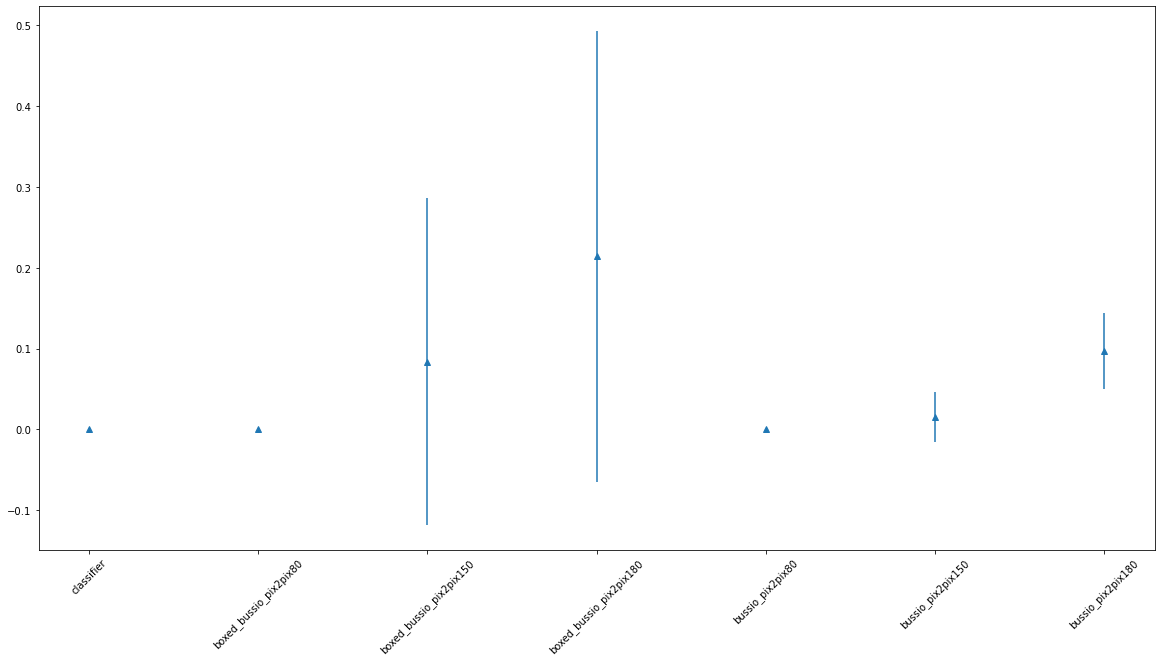

In [135]:
measure_path = ["negative_network", "f1_binary"]
dump_stat(measure_path)

pigment_network f1_binary
                              avg       var
classifier               0.846388  0.010549
boxed_bussio_pix2pix80   0.807545  0.014091
boxed_bussio_pix2pix150  0.869422  0.022119
boxed_bussio_pix2pix180  0.885389  0.023972
bussio_pix2pix80         0.818933  0.014624
bussio_pix2pix150        0.856556  0.015792
bussio_pix2pix180        0.866259  0.019562


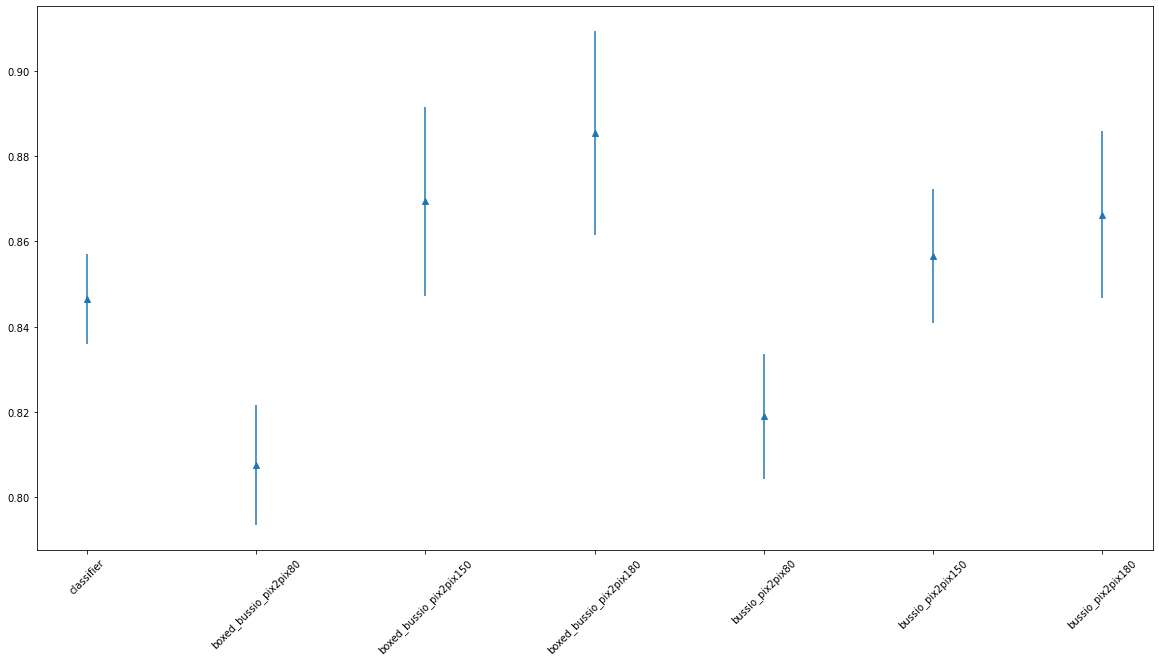

In [136]:
measure_path = ["pigment_network", "f1_binary"]
dump_stat(measure_path)

streaks f1_binary
                              avg       var
classifier               0.073016  0.150283
boxed_bussio_pix2pix80   0.146825  0.176933
boxed_bussio_pix2pix150  0.534444  0.166137
boxed_bussio_pix2pix180  0.565958  0.174605
bussio_pix2pix80         0.085714  0.130931
bussio_pix2pix150        0.461717  0.088140
bussio_pix2pix180        0.569870  0.134766


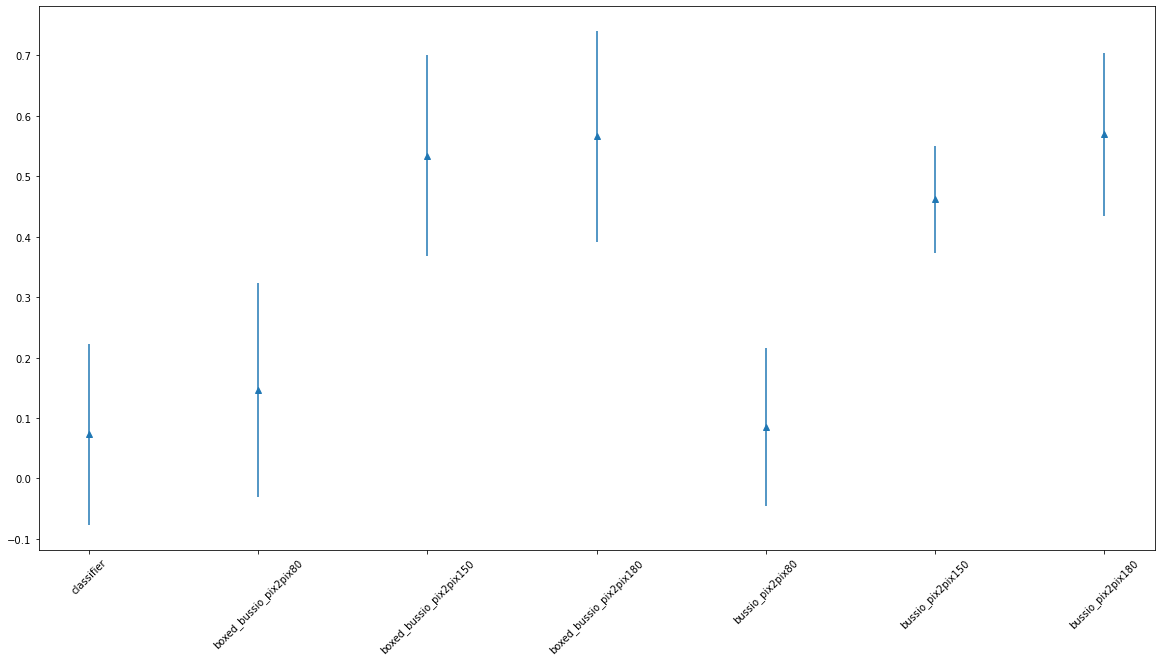

In [137]:
measure_path = ["streaks", "f1_binary"]
dump_stat(measure_path)

# заболевания auc

globules auc
                              avg       var
classifier               0.670588  0.023132
boxed_bussio_pix2pix80   0.599994  0.022521
boxed_bussio_pix2pix150  0.756793  0.050592
boxed_bussio_pix2pix180  0.793852  0.052919
bussio_pix2pix80         0.612150  0.027091
bussio_pix2pix150        0.748432  0.025457
bussio_pix2pix180        0.747988  0.028121


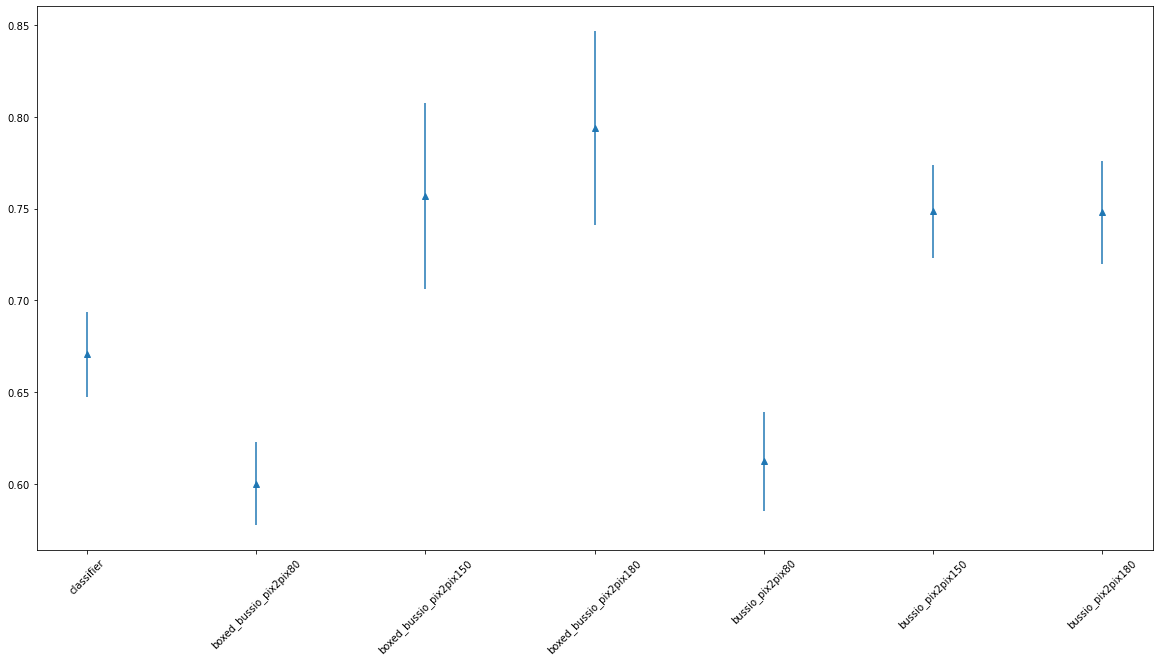

In [138]:
measure_path = ["globules", "auc"]
dump_stat(measure_path)

milia_like_cyst auc
                              avg       var
classifier               0.547680  0.014521
boxed_bussio_pix2pix80   0.543553  0.015055
boxed_bussio_pix2pix150  0.608392  0.067328
boxed_bussio_pix2pix180  0.658312  0.070259
bussio_pix2pix80         0.536685  0.012120
bussio_pix2pix150        0.595306  0.021793
bussio_pix2pix180        0.613816  0.020602


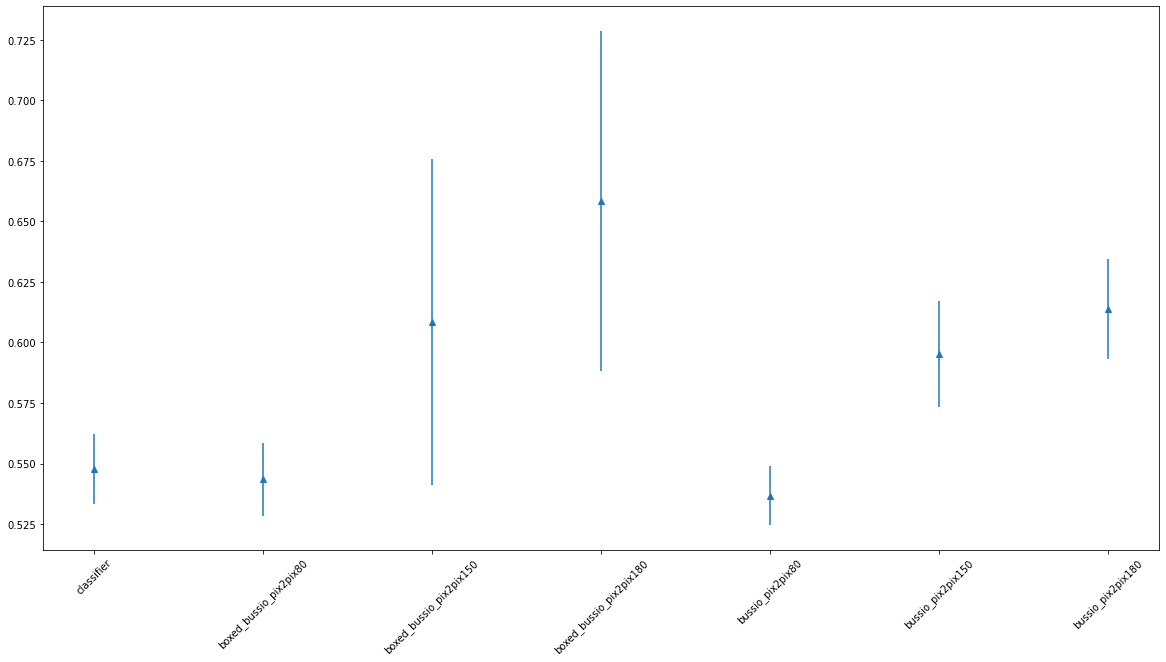

In [139]:
measure_path = ["milia_like_cyst", "auc"]
dump_stat(measure_path)

negative_network auc
                              avg       var
classifier               0.500000  0.000000
boxed_bussio_pix2pix80   0.500000  0.000000
boxed_bussio_pix2pix150  0.530000  0.077071
boxed_bussio_pix2pix180  0.578889  0.111715
bussio_pix2pix80         0.500000  0.000000
bussio_pix2pix150        0.504000  0.008000
bussio_pix2pix180        0.525333  0.013154


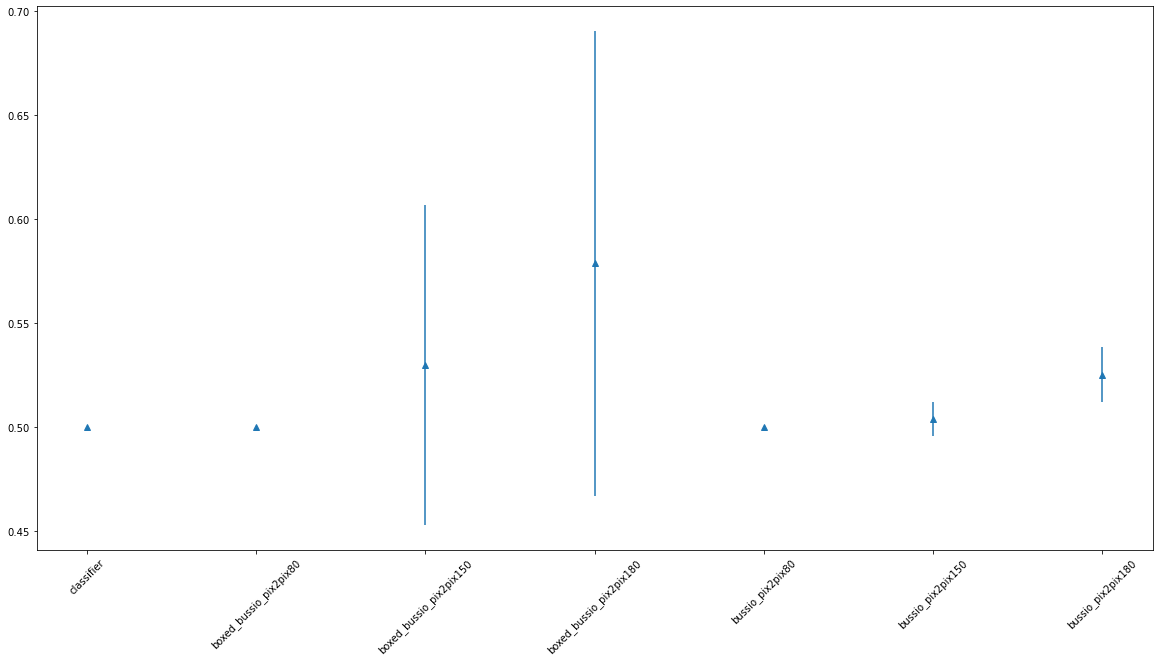

In [140]:
measure_path = ["negative_network", "auc"]
dump_stat(measure_path)

pigment_network auc
                              avg       var
classifier               0.799202  0.019206
boxed_bussio_pix2pix80   0.763122  0.020950
boxed_bussio_pix2pix150  0.832063  0.026097
boxed_bussio_pix2pix180  0.851017  0.026713
bussio_pix2pix80         0.774213  0.020797
bussio_pix2pix150        0.815029  0.019828
bussio_pix2pix180        0.828745  0.022816


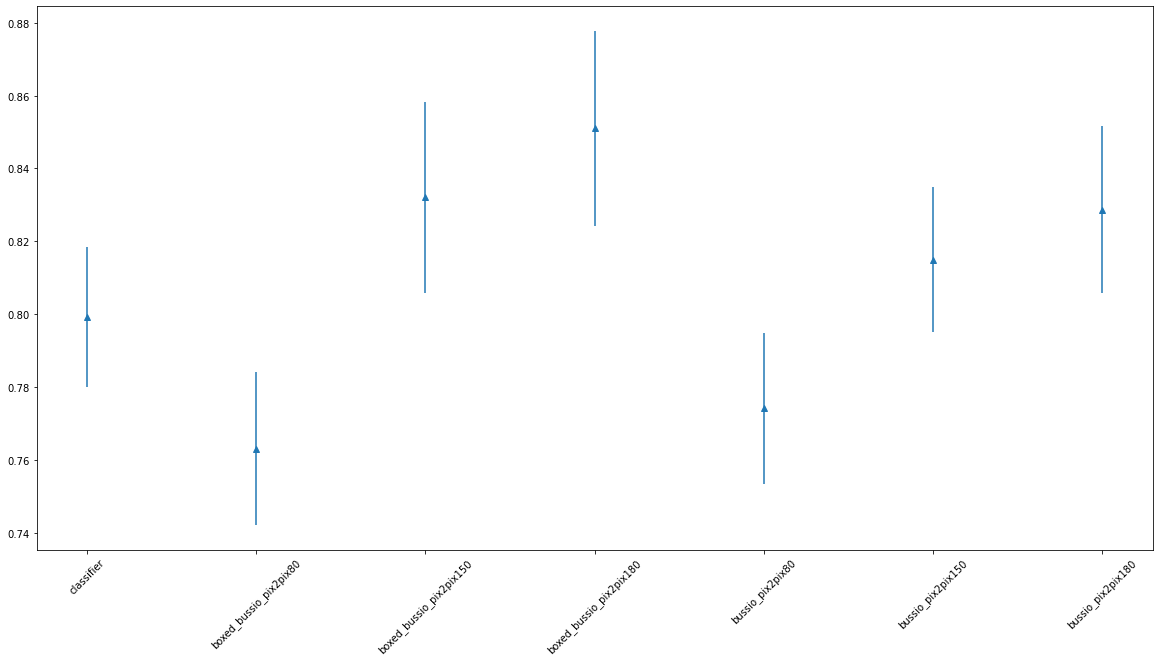

In [141]:
measure_path = ["pigment_network", "auc"]
dump_stat(measure_path)

streaks auc
                              avg       var
classifier               0.524795  0.052816
boxed_bussio_pix2pix80   0.545841  0.057121
boxed_bussio_pix2pix150  0.737978  0.095429
boxed_bussio_pix2pix180  0.766991  0.116323
bussio_pix2pix80         0.524795  0.038327
bussio_pix2pix150        0.688183  0.038721
bussio_pix2pix180        0.770492  0.075611


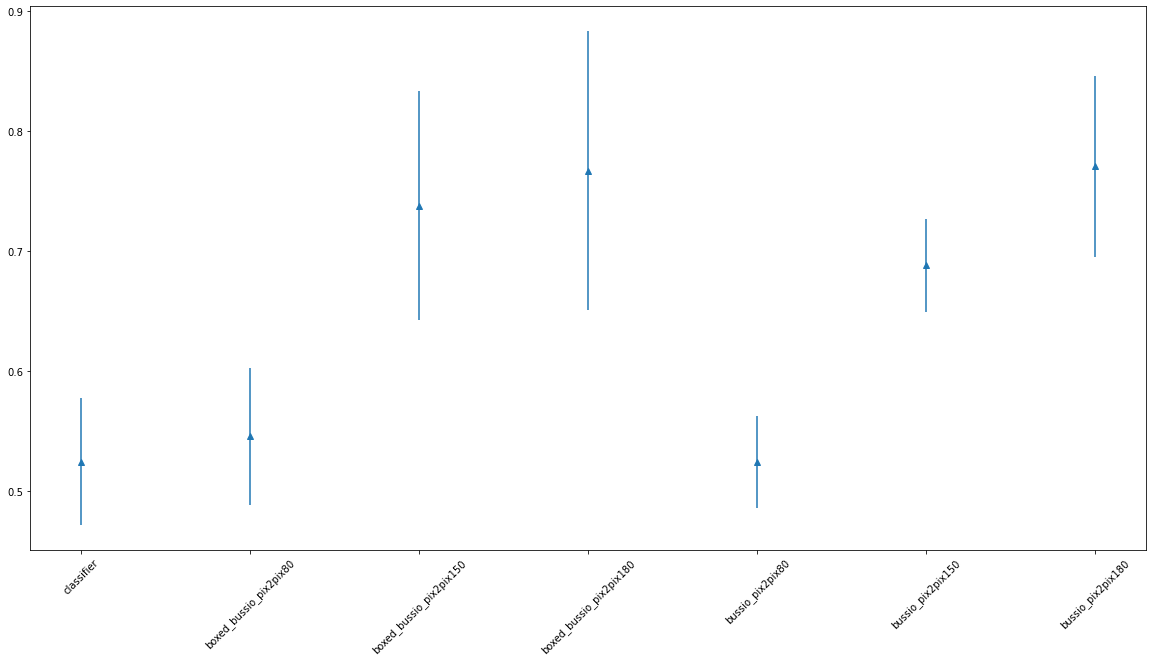

In [142]:
measure_path = ["streaks", "auc"]
dump_stat(measure_path)